In [72]:
import dharpa
from rich.jupyter import print
from dharpa.data.core import schemas_to_dict
from dharpa.graphs.utils import graph_to_image


In [73]:
# create the workflow object
workflow = dharpa.create_workflow("xor")

# display the input schema
print("Input schema:")
print(schemas_to_dict(**workflow.input_schema))

In [74]:
# display the output schema
print("Output schema:")
print(schemas_to_dict(**workflow.output_schema))

In [75]:
# get the current state (string) of the workflow
print(f"Workflow state before inputs: {workflow.state}")

# set inputs
workflow.inputs.a = True
workflow.inputs.b = False

# get the new state (string) of the workflow
print(f"Workflow state after inputs: {workflow.state}")

In [76]:
# now we execute the workflow
await workflow.process()

processing started: xor.xor
processing started: xor.or
processing finished: xor.or
processing started: xor.nand
processing started: nand.and
processing finished: nand.and
processing started: nand.not
processing finished: nand.not
processing finished: xor.nand
processing started: xor.and
processing finished: xor.and
processing finished: xor.xor


In [77]:
# let's look at the new state (string) of the workflow after processing
print(f"Workflow state after processing: {workflow.state}")

In [78]:
print(f"Workflow output values: {workflow.outputs.ALL}")

In [79]:
# instead of just the state string, on every step along the way we can also get more detailed information about the current state

state = workflow.to_dict()
print(state)

In [80]:
# also, visually

state_graph = workflow.create_state_graph()
from asciinet import graph_to_ascii
print(graph_to_ascii(state_graph))

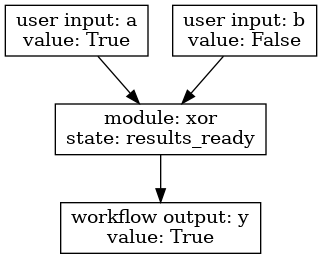

In [81]:
# or, using pygraphviz
graph_to_image(state_graph)

In [82]:
# or, including the internal structure
state_graph = workflow.create_state_graph(show_structure=True)
from asciinet import graph_to_ascii
print(graph_to_ascii(state_graph))

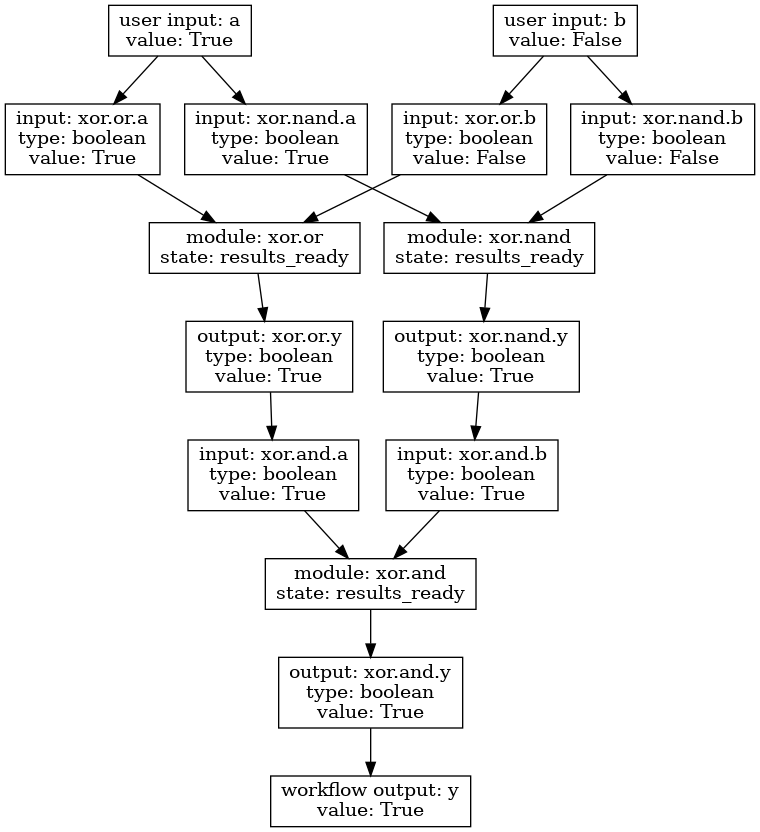

In [83]:
# and with pygraphviz
graph_to_image(state_graph)


